# Importing the libraries
- We are going to import the libraries that we will use for visualizing data  

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading and visualizing the structure of the dataframe.
- We are going to use the following  codes below to uncover the structure of the dataframe.
# Abbreviations
- Dom_Pax (Domestic Air travel passngers)
- Int_Pax (International Air travel Passengers)
- Pax (Total Air travel Passengers)
- Dom_Flt ( Number of Domestic flights)
- Int_flt (Nuber of international flights)
- flt (Number of flights)
- Dom_RPM (Revenue Passengers Miles for Domestic)
- Int_RPM (Revenue Passengers Mile for International)
- RPM (Revenue Passenger Miles)
- Dom_ASM (Available Seat Mile for Domestic)
- Int_ASM (Available seat Miles for Internationals)
- LF load factor(Passengers miles as a proportion of available seat miles in percentages)

In [149]:
#Code for importing and reading the csv file and visualizing the data frame
air_traffic = pd.read_csv("air traffic.csv")
air_traffic.head(10)# visualizing the data frames and the variables in it.
#air_traffic.shape


Year  Month     Dom_Pax    Int_Pax         Pax  Dom_Flt Int_Flt      Flt  \
0  2003      1  43,032,450  4,905,830  47,938,280  785,160  57,667  842,827   
1  2003      2  41,166,780  4,245,366  45,412,146  690,351  51,259  741,610   
2  2003      3  49,992,700  5,008,613  55,001,313  797,194  58,926  856,120   
3  2003      4  47,033,260  4,345,444  51,378,704  766,260  55,005  821,265   
4  2003      5  49,152,352  4,610,834  53,763,186  789,397  55,265  844,662   
5  2003      6  52,209,516  5,411,504  57,621,020  798,351  58,225  856,576   
6  2003      7  55,810,773  6,191,120  62,001,893  831,619  62,957  894,576   
7  2003      8  53,920,973  6,272,332  60,193,305  830,737  63,760  894,497   
8  2003      9  44,213,408  4,824,596  49,038,004  781,804  54,017  835,821   
9  2003     10  49,944,931  4,920,822  54,865,753  818,308  54,272  872,580   

      Dom_RPM     Int_RPM         RPM     Dom_ASM     Int_ASM         ASM  \
0  36,211,422  12,885,980  49,097,402  56,191,300  17,968,572  74,159,872   
1  34,148,439  10,715,468  44,863,907  50,088,434  15,587,880  65,676,314   
2  41,774,564  12,567,068  54,341,633  57,592,901  17,753,174  75,346,075   
3  39,465,980  10,370,592  49,836,572  54,639,679  15,528,761  70,168,440   
4  41,001,934  11,575,026  52,576,960  55,349,897  15,629,821  70,979,718   
5  44,492,972  13,918,185  58,411,157  56,555,517  17,191,579  73,747,096   
6  48,321,924  15,516,794  63,838,718  59,617,048  18,701,759  78,318,807   
7  46,982,527  15,906,430  62,888,957  59,634,190  19,144,885  78,779,075   
8  36,819,820  13,570,889  50,390,709  54,973,852  17,820,478  72,794,329   
9  41,480,412  13,447,446  54,927,858  58,001,020  17,694,417  75,695,437   

   Dom_LF  Int_LF     LF  
0   64.44   71.71  66.20  
1   68.18   68.74  68.31  
2   72.53   70.79  72.12  
3   72.23   66.78  71.02  
4   74.08   74.06  74.07  
5   78.67   80.96  79.20  
6   81.05   82.97  81.51  
7   78.78   83.08  79.83  
8   66.98   76.15  69.22  
9   71.52   76.00  72.56

- Number of international  flights

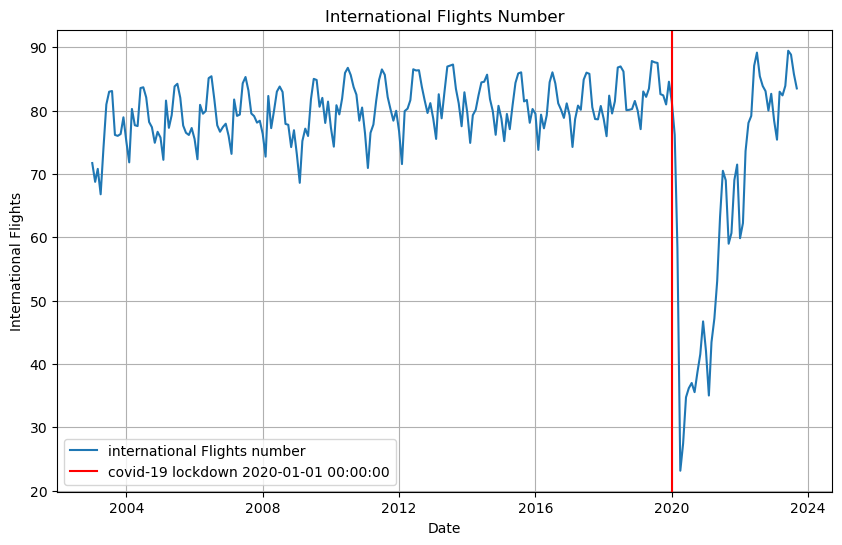

In [150]:
#create a date column
air_traffic['date'] = pd.to_datetime(air_traffic[['Year', 'Month']].assign(DAY=1))

#lockdown start date
lockdown_date = pd.Timestamp('2020-01-01')


#plot with matplotlib
plt.figure(figsize =(10,6)) 
plt.plot(air_traffic['date'],air_traffic['Int_LF'], label ='international Flights number' )
plt.axvline(lockdown_date, color = 'r', label = f'covid-19 lockdown {lockdown_date}')
plt.title('International Flights Number')
plt.xlabel('Date')
plt.ylabel('International Flights')
plt.grid(True)
plt.legend()
plt.show()

- International flights before lockdown

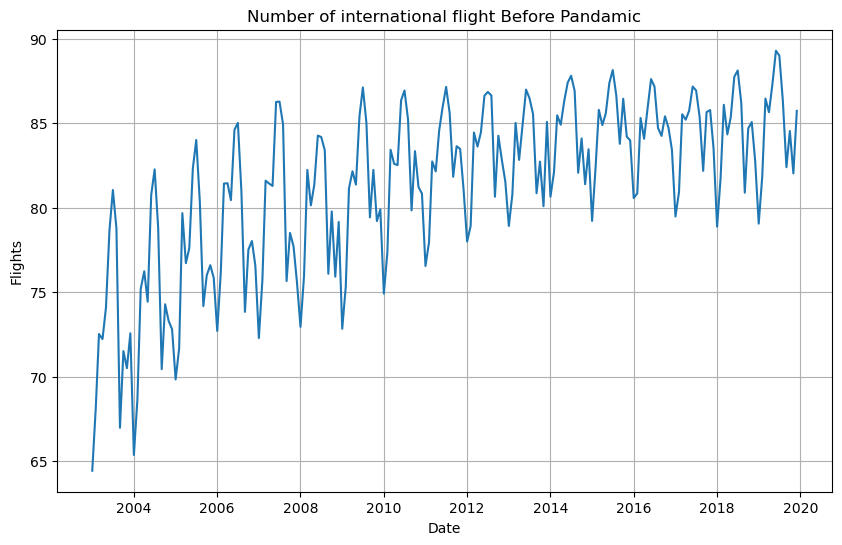

In [151]:
# create dataframe before lockdown
air_traffic_normal_times = air_traffic[air_traffic['date'] <lockdown_date]

#plot using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(air_traffic_normal_times['date'], air_traffic_normal_times['Dom_LF'])
plt.grid(True)
plt.title('Number of international flight Before Pandamic')
plt.xlabel('Date')
plt.ylabel('Flights')
plt.show()

# Data Manipulation
- In this step we are going to do the following to ensure our data is easier to plot:
1. Subset the data; selecting the only required columns.
2. Converting the strings datatypes into floats.
3. Grouping by year and performing aggregation by summing up the columns.

In [152]:
selected_columns = air_traffic[['Year','Month', 'Pax', 'Flt', 'RPM','ASM', 'LF']]
#selected_columns.dtypes
selected_columns['Pax'] = selected_columns['Pax'].str.replace(',', '',).astype('int')
selected_columns['Flt'] = selected_columns['Flt'].str.replace(',', '',).astype('int')
selected_columns['RPM'] = selected_columns['RPM'].str.replace(',', '',).astype('int')
selected_columns['ASM'] = selected_columns['ASM'].str.replace(',', '',).astype('int')
selected_columns.dtypes
selected_columns.head(10)

/var/folders/rr/dp90h_ln1r9_rpmdx_c7x5jr0000gn/T/ipykernel_11378/2844839766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Pax'] = selected_columns['Pax'].str.replace(',', '',).astype('int')
/var/folders/rr/dp90h_ln1r9_rpmdx_c7x5jr0000gn/T/ipykernel_11378/2844839766.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Flt'] = selected_columns['Flt'].str.replace(',', '',).astype('int')
/var/folders/rr/dp90h_ln1r9_rpmdx_c7x5jr0000gn/T/ipykernel_11378/2844839766.py:5: Se

Year  Month       Pax     Flt       RPM       ASM     LF
0  2003      1  47938280  842827  49097402  74159872  66.20
1  2003      2  45412146  741610  44863907  65676314  68.31
2  2003      3  55001313  856120  54341633  75346075  72.12
3  2003      4  51378704  821265  49836572  70168440  71.02
4  2003      5  53763186  844662  52576960  70979718  74.07
5  2003      6  57621020  856576  58411157  73747096  79.20
6  2003      7  62001893  894576  63838718  78318807  81.51
7  2003      8  60193305  894497  62888957  78779075  79.83
8  2003      9  49038004  835821  50390709  72794329  69.22
9  2003     10  54865753  872580  54927858  75695437  72.56

In [153]:
# Assuming 'columns_to_sum' is a list of columns you want to sum
columns_to_sum = ['Pax', 'Flt', 'RPM','ASM', 'LF']

# Group by 'Year' and sum only the specified columns
a1 = selected_columns.groupby('Year')[columns_to_sum].sum()
a1

Pax       Flt         RPM         ASM       LF
Year                                                      
2003  644234973  10136163   649953738   884743407   879.92
2004  700230727  10699663   726171974   962094392   903.79
2005  735104668  10825881   771018649   993010839   929.77
2006  741098199  10521442   789688687   996711186   949.17
2007  766626582  10671436   822499629  1029054390   957.30
2008  740460933  10202000   805561496  1012796575   952.35
2009  701164455   9542320   763331174   949242411   962.88
2010  717744056   9499044   792208444   965310742   982.46
2011  728368297   9456417   808864801   985260994   983.01
2012  734322469   9267341   817627684   987420599   991.68
2013  740859387   9152494   834782638  1004140147   995.56
2014  761003553   8954422   858029553  1028487122   999.16
2015  796914123   8896612   899034052  1073106174  1003.39
2016  822888623   9025706   931025625  1116048267   999.44
2017  848769671   9021841   962949559  1153149529  1000.18
2018  888629905   9256800  1010572607  1207036478  1002.68
2019  926436914   9463718  1054798537  1246032776  1013.71
2020  371605513   5560365   379609761   648153384   627.09
2021  666148232   7315083   687823862   932696131   863.63
2022  852813526   8174516   947924346  1140649386   992.88
2023  702453112   6456970   807529364   963708451   752.24

# Exploring basic descriptive Statistics
- We are going to use describe function to get basic statistics of numerical columns like mean, median and 
  standard deviation which provides an overview of the central tendency and variability of the data

In [154]:
a1.describe()

Pax           Flt           RPM           ASM           LF
count  2.100000e+01  2.100000e+01  2.100000e+01  2.100000e+01    21.000000
mean   7.422799e+08  9.147630e+06  8.152860e+08  1.013279e+09   940.109048
std    1.113746e+08  1.352196e+06  1.422944e+08  1.249315e+08    95.216875
min    3.716055e+08  5.560365e+06  3.796098e+08  6.481534e+08   627.090000
25%    7.024531e+08  8.954422e+06  7.710186e+08  9.637085e+08   929.770000
50%    7.404609e+08  9.267341e+06  8.088648e+08  9.967112e+08   982.460000
75%    7.969141e+08  1.013616e+07  8.990341e+08  1.073106e+09   999.160000
max    9.264369e+08  1.082588e+07  1.054799e+09  1.246033e+09  1013.710000

- Checking the missing values in the dataset we use the isnull() function below

In [155]:
a1.isnull().sum()

Pax    0
Flt    0
RPM    0
ASM    0
LF     0
dtype: int64

In [156]:
a1.sort_values(by='LF', ascending=False, inplace=True)
a1

Pax       Flt         RPM         ASM       LF
Year                                                      
2019  926436914   9463718  1054798537  1246032776  1013.71
2015  796914123   8896612   899034052  1073106174  1003.39
2018  888629905   9256800  1010572607  1207036478  1002.68
2017  848769671   9021841   962949559  1153149529  1000.18
2016  822888623   9025706   931025625  1116048267   999.44
2014  761003553   8954422   858029553  1028487122   999.16
2013  740859387   9152494   834782638  1004140147   995.56
2022  852813526   8174516   947924346  1140649386   992.88
2012  734322469   9267341   817627684   987420599   991.68
2011  728368297   9456417   808864801   985260994   983.01
2010  717744056   9499044   792208444   965310742   982.46
2009  701164455   9542320   763331174   949242411   962.88
2007  766626582  10671436   822499629  1029054390   957.30
2008  740460933  10202000   805561496  1012796575   952.35
2006  741098199  10521442   789688687   996711186   949.17
2005  735104668  10825881   771018649   993010839   929.77
2004  700230727  10699663   726171974   962094392   903.79
2003  644234973  10136163   649953738   884743407   879.92
2021  666148232   7315083   687823862   932696131   863.63
2023  702453112   6456970   807529364   963708451   752.24
2020  371605513   5560365   379609761   648153384   627.09

<Axes: xlabel='Year', ylabel='Pax'>

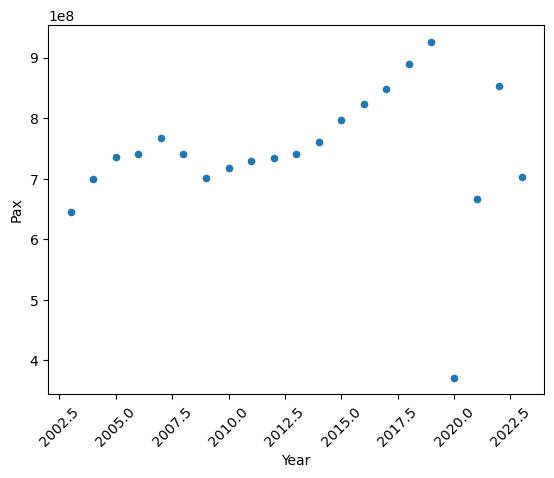

In [157]:
a1_reset = a1.reset_index() # this code is used to reset the index to make the year a regular column 
#a1.plot(x='Year', y='Pax', rot=45, kind='scatter')
a1_reset.plot(x='Year', y='Pax', rot=45, kind='scatter')


From the scatter plot visualization, there was a gradual increase in the number of passengers travelling by air from 2003 to 2007 where we notice a decrease 2009. Then gardual increase from 2010 to 2020 where we experienced covid pandemic again another drop is noticed 2023 which are yet to be identify in our next prediction class.